<a href="https://colab.research.google.com/github/Vianneydsouza/Machine-Learning-Projects/blob/main/FMT_Project_Vianney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Done using Google Colab

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform
from sklearn.decomposition import PCA
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###1. Import and understand the data

In [ ]:
#importing csv file
signal = pd.read_csv('/content/drive/MyDrive/python/CSV/signal-data.csv')
signal.head(15)

Time        0        1          2          3       4  \
0   2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1   2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2   2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3   2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4   2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
5   2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334   
6   2008-07-19 19:44:00  3030.27  2430.12  2230.4222  1463.6606  0.8294   
7   2008-07-19 19:45:00  3058.88  2690.15  2248.9000  1004.4692  0.7884   
8   2008-07-19 20:24:00  2967.68  2600.47  2248.9000  1004.4692  0.7884   
9   2008-07-19 21:35:00  3016.11  2428.37  2248.9000  1004.4692  0.7884   
10  2008-07-19 21:57:00  2994.05  2548.21  2195.1222  1046.1468  1.3204   
11  2008-07-19 22:52:00  2928.84  2479.40  2196.2111  1605.7578  0.9959   
12  2008-07-20 03:35:00  2920.07  2507.40  2195.1222  1046.1468  1.3204   
13  2008-07-21 08:21:00  3051.44  2529.27  2184.4333   877.6266  1.4668   
14  2008-07-21 11:53:00  2963.97  2629.48  2224.6222   947.7739  1.2924   

        5         6       7       8  ...       581     582     583     584  \
0   100.0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   
1   100.0  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   
2   100.0   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   
3   100.0  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   
4   100.0  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045   
5   100.0  100.3967  0.1235  1.5287  ...   44.0077  0.4949  0.0189  0.0044   
6   100.0  102.3433  0.1247  1.5816  ...       NaN  0.5010  0.0143  0.0042   
7   100.0  106.2400  0.1185  1.5153  ...   95.0310  0.4984  0.0106  0.0034   
8   100.0  106.2400  0.1185  1.5358  ...  111.6525  0.4993  0.0172  0.0046   
9   100.0  106.2400  0.1185  1.5381  ...   90.2294  0.4967  0.0152  0.0038   
10  100.0  103.3400  0.1223  1.5144  ...   57.8122  0.4925  0.0158  0.0041   
11  100.0   97.9156  0.1257  1.4690  ...   75.5077  0.4987  0.0427  0.0092   
12  100.0  103.3400  0.1223  1.5310  ...   52.2039  0.4950  0.0153  0.0041   
13  100.0  107.8711  0.1240  1.5236  ...       NaN  0.5034  0.0151  0.0038   
14  100.0  104.8489  0.1197  1.4474  ...  142.9080  0.5077  0.0094  0.0026   

        585     586     587     588       589  Pass/Fail  
0    2.3630     NaN     NaN     NaN       NaN         -1  
1    4.4447  0.0096  0.0201  0.0060  208.2045         -1  
2    3.1745  0.0584  0.0484  0.0148   82.8602          1  
3    2.0544  0.0202  0.0149  0.0044   73.8432         -1  
4   99.3032  0.0202  0.0149  0.0044   73.8432         -1  
5    3.8276  0.0342  0.0151  0.0052   44.0077         -1  
6    2.8515  0.0342  0.0151  0.0052   44.0077         -1  
7    2.1261  0.0204  0.0194  0.0063   95.0310         -1  
8    3.4456  0.0111  0.0124  0.0045  111.6525         -1  
9    3.0687  0.0212  0.0191  0.0073   90.2294         -1  
10   3.2115  0.0355  0.0205  0.0071   57.8122          1  
11   8.5646  0.0370  0.0279  0.0081   75.5077          1  
12   3.0926  0.0188  0.0098  0.0034   52.2039         -1  
13   3.0063  0.0188  0.0098  0.0034   52.2039         -1  
14   1.8483  0.0202  0.0289  0.0084  142.9080          1  

[15 rows x 592 columns]

In [ ]:
signal.describe() #getting five point summary

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [ ]:
signal.shape

(1567, 592)

In [ ]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


###2. Data cleansing

In [ ]:
signal.isnull().sum() #looking for any null values

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
print(signal.isnull().sum())

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


In [ ]:
non_numeric_columns = signal.select_dtypes(exclude=['number']).columns #selecting non-numeric columns
print(non_numeric_columns)

Index(['Time'], dtype='object')


In [ ]:
signal = signal.drop(columns=non_numeric_columns) #dropping the non-numeric column

In [ ]:
signal.shape

(1567, 591)

In [ ]:
signal.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

In [ ]:
#writing a loop which will remove all the features with 20% +Null values and imputing rest with mean of the feature
def handle_nulls(signal):
  for col in signal.columns:
    null_percentage = (signal[col].isnull().sum()/len(signal))*100
    if null_percentage > 20:
      signal = signal.drop(col, axis=1)
    else:
      signal[col]= signal[col].fillna(signal[col].mean())
  return signal

In [ ]:
signal.shape

(1567, 591)

In [ ]:
signal.describe().T

count         mean         std        min          25%        50%  \
0          1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.4900   
1          1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.4050   
2          1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.0667   
3          1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.2144   
4          1553.0     4.197013   56.355540     0.6815     1.017700     1.3168   
...           ...          ...         ...        ...          ...        ...   
586        1566.0     0.021458    0.012358    -0.0169     0.013425     0.0205   
587        1566.0     0.016475    0.008808     0.0032     0.010600     0.0148   
588        1566.0     0.005283    0.002867     0.0010     0.003300     0.0046   
589        1566.0    99.670066   93.891919     0.0000    44.368600    71.9005   
Pass/Fail  1567.0    -0.867262    0.498010    -1.0000    -1.000000    -1.0000   

                 75%        max  
0          3056.6500  3356.3500  
1          2538.8225  2846.4400  
2          2218.0555  2315.2667  
3          1591.2235  3715.0417  
4             1.5257  1114.5366  
...              ...        ...  
586           0.0276     0.1028  
587           0.0203     0.0799  
588           0.0064     0.0286  
589         114.7497   737.3048  
Pass/Fail    -1.0000     1.0000  

[591 rows x 8 columns]

In [ ]:
#dropping features which have same values for all rows
signal = signal.loc[:, signal.nunique() !=1]

In [ ]:
signal.shape

(1567, 475)

In [ ]:
#checking for distribution of the target class shows that the data set is highly imbalanced
signal['Pass/Fail'].value_counts(normalize=True)

Pass/Fail
-1    0.933631
 1    0.066369
Name: proportion, dtype: float64

In [ ]:
#checking how many rows have missing values
rows=signal.isnull().any(axis=1).sum()
print(rows)

1567


In [ ]:
#replacing the Nan/na with zero
signal.fillna(0, inplace=True)

In [ ]:
rows=signal.isnull().any(axis=1).sum()
print(rows)

0


<Axes: >

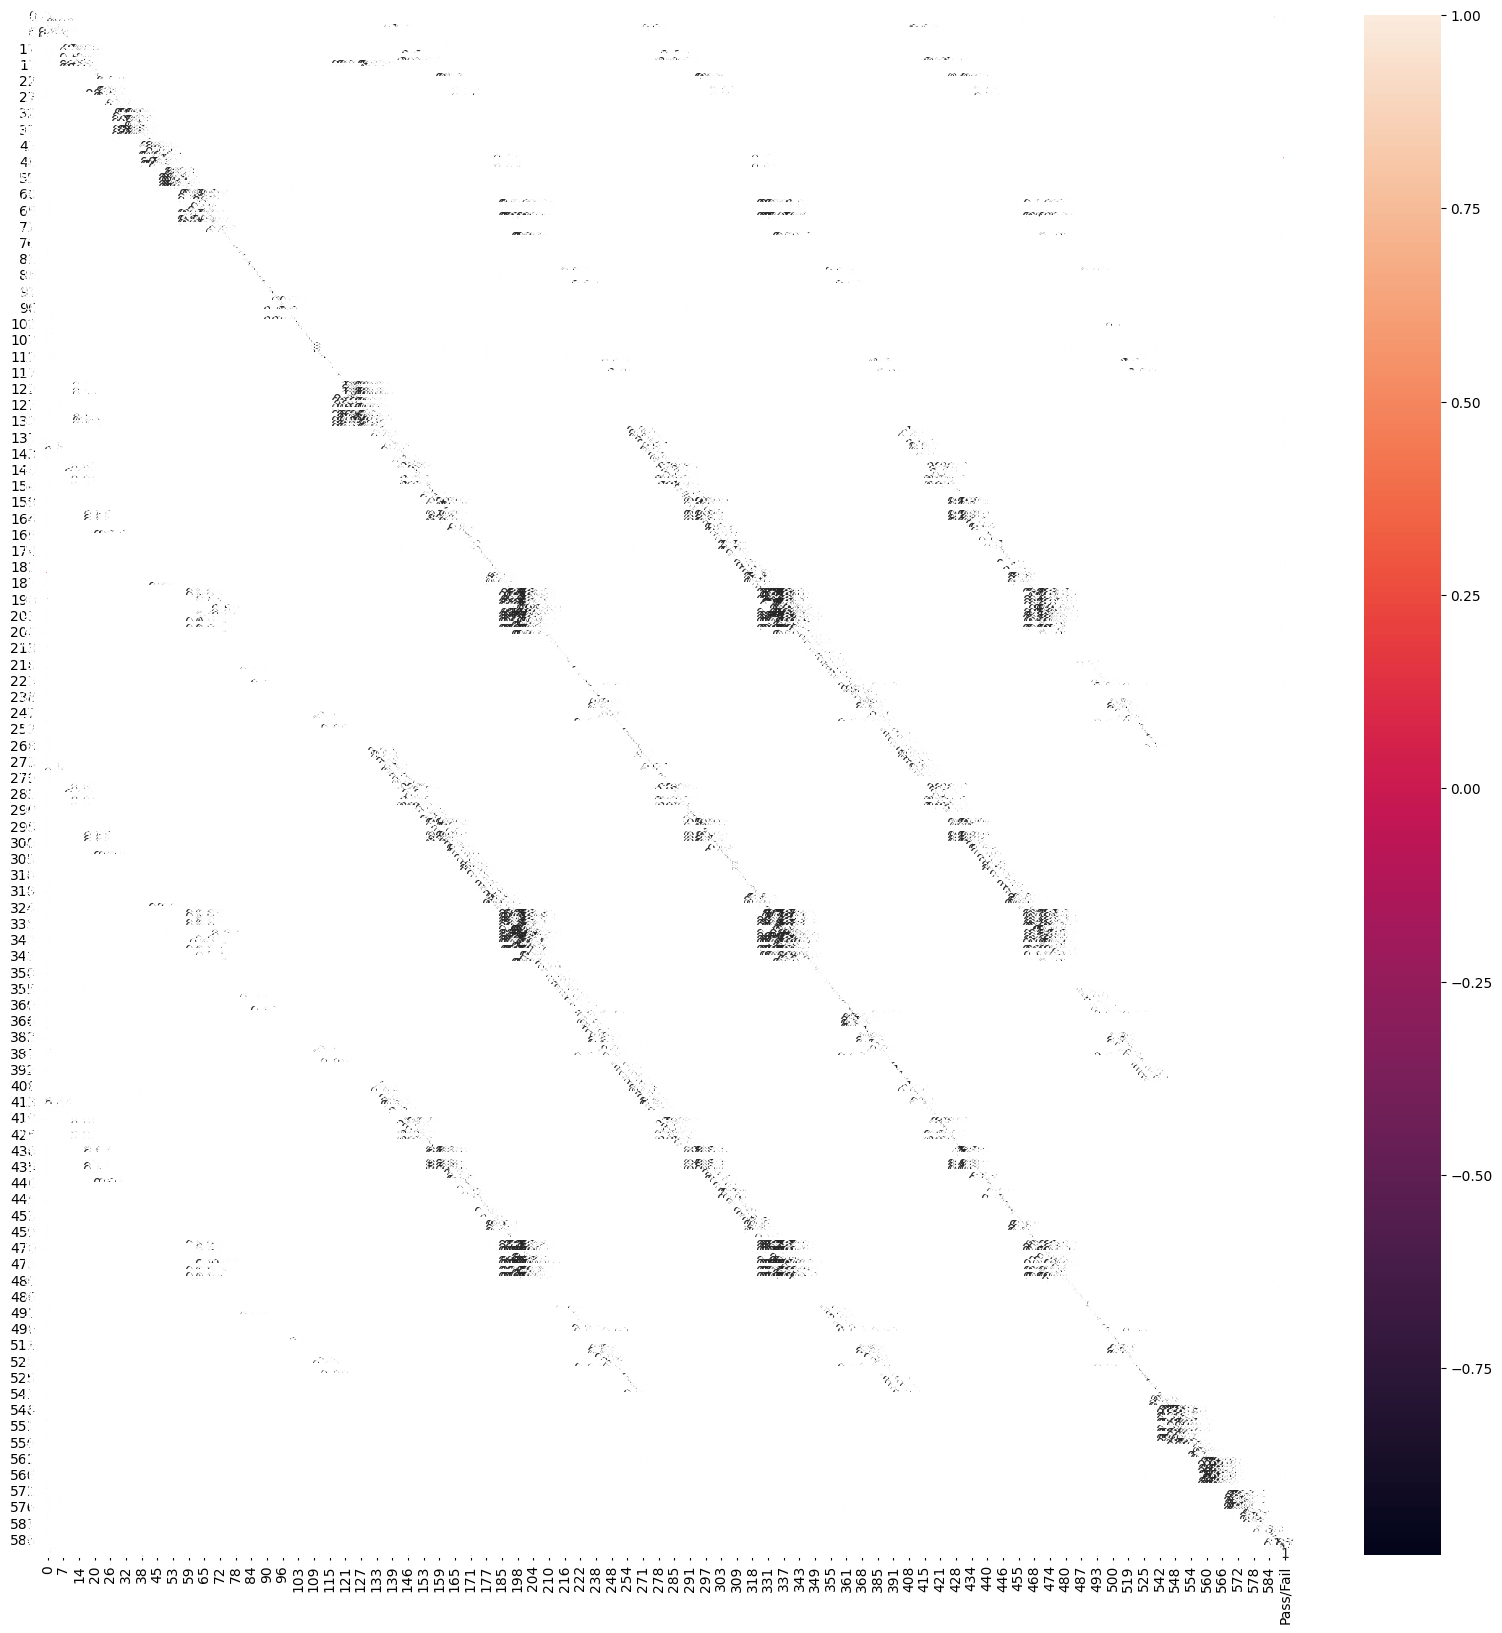

In [ ]:
#checking multicollinearity
plt.figure(figsize=(20,20))
sns.heatmap(signal.corr(),annot=True)

In [ ]:
data = signal.copy() #making a copy of the data
data.drop(['Pass/Fail'], axis=1, inplace=True)

In [ ]:
# creatung corelation matrix
corr_matrix = data.corr().abs()

In [ ]:
#selecting upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [ ]:
#we will now find those features with correlation greater than 0.70
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column]>0.70)]

print("Highly correlated features to consider dropping:")
print(to_drop)

Highly correlated features to consider dropping:
['6', '7', '12', '17', '18', '22', '26', '27', '30', '34', '35', '37', '38', '39', '46', '48', '50', '51', '54', '55', '56', '57', '58', '61', '65', '66', '68', '70', '73', '96', '98', '101', '104', '105', '106', '110', '111', '123', '124', '125', '127', '128', '131', '132', '133', '140', '147', '148', '152', '154', '163', '164', '165', '174', '185', '187', '196', '197', '198', '199', '202', '203', '204', '205', '206', '207', '209', '220', '245', '246', '248', '249', '252', '254', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '316', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '34

In [ ]:
data.shape

(1567, 474)

In [ ]:
data.drop(to_drop, axis=1, inplace=True)

In [ ]:
data.shape

(1567, 195)

###3. Data analysis & visualisation

In [ ]:
# Calculating the number of rows and columns for subplots
num_features = len(data.columns)
num_cols = 10
num_rows = (num_features + num_cols - 1) // num_cols

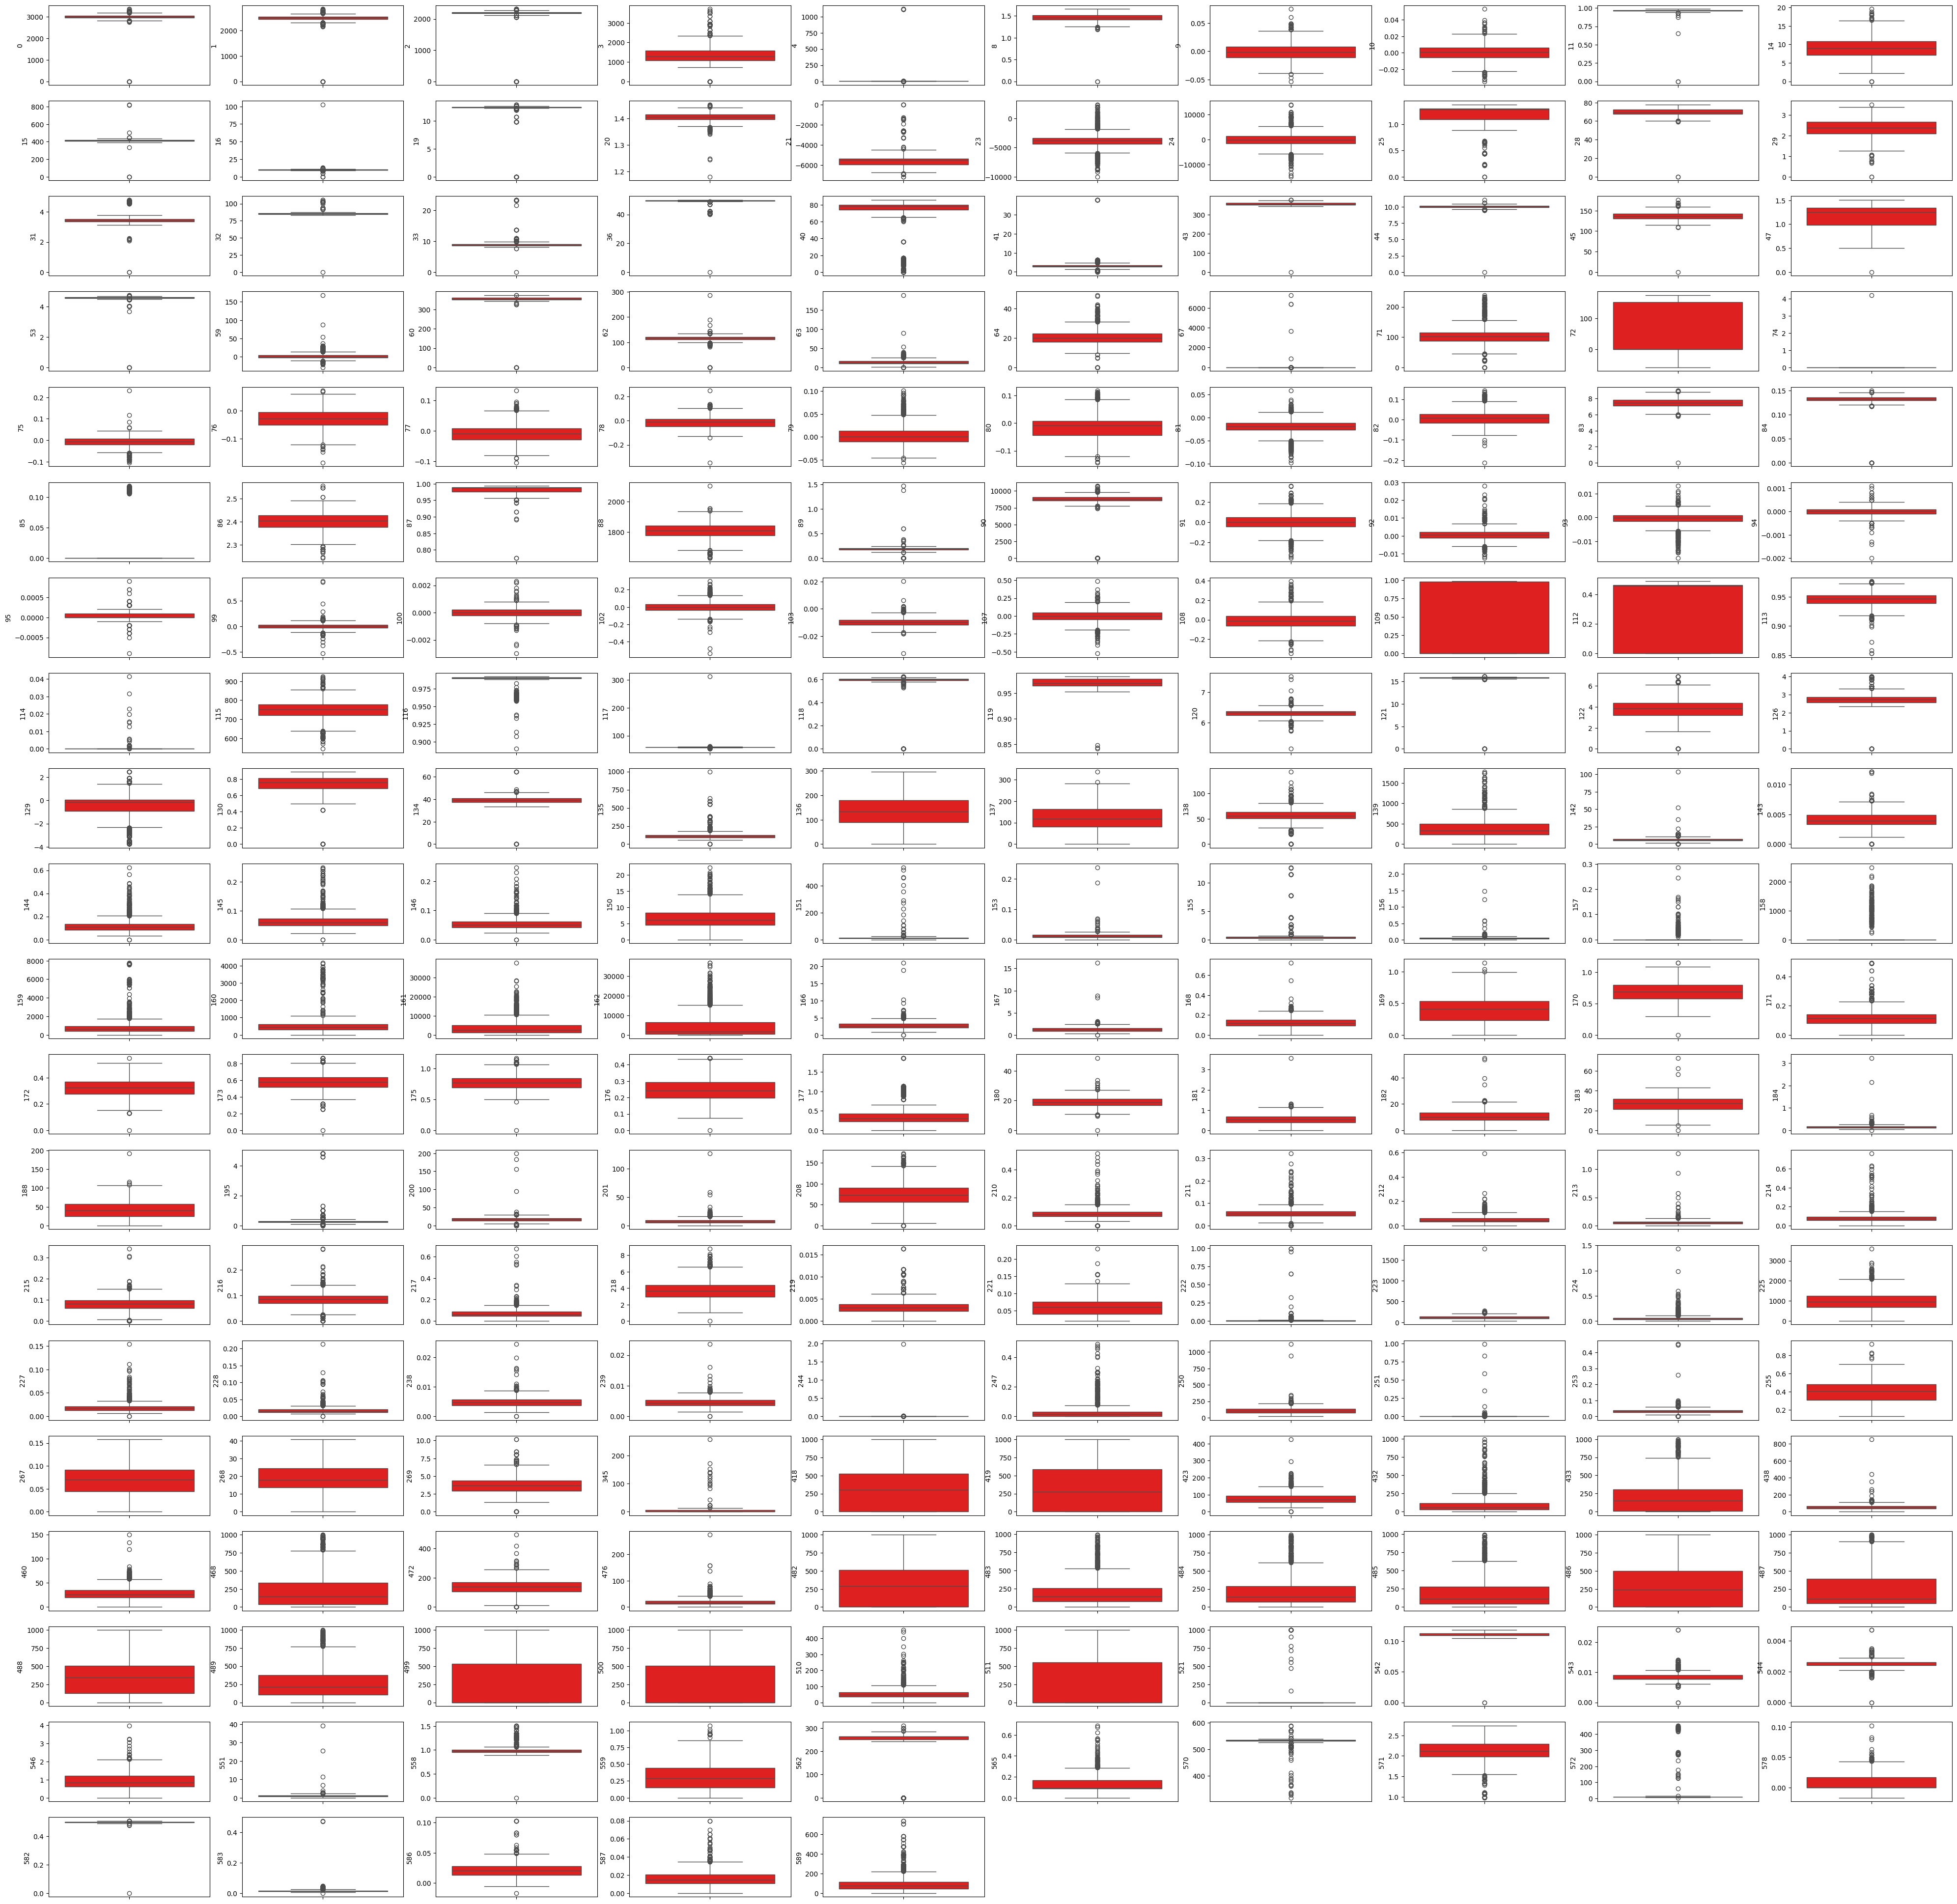

In [ ]:
#plotting boxplot for outliers
plt.figure(figsize=(50,50))
col=1
for i in data.columns:
  plt.subplot(num_rows, num_cols, col)
  sns.boxplot(data[i], color='red')
  col+=1

Here we can see lot of attributes have outliers, they may have to be replaced with median.

In [ ]:
#finding the outliers and replacing them with median
for i in data.columns:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  data[i] = np.where((data[i] < lower_bound) | (data[i] > upper_bound), data[i].median(), data[i])

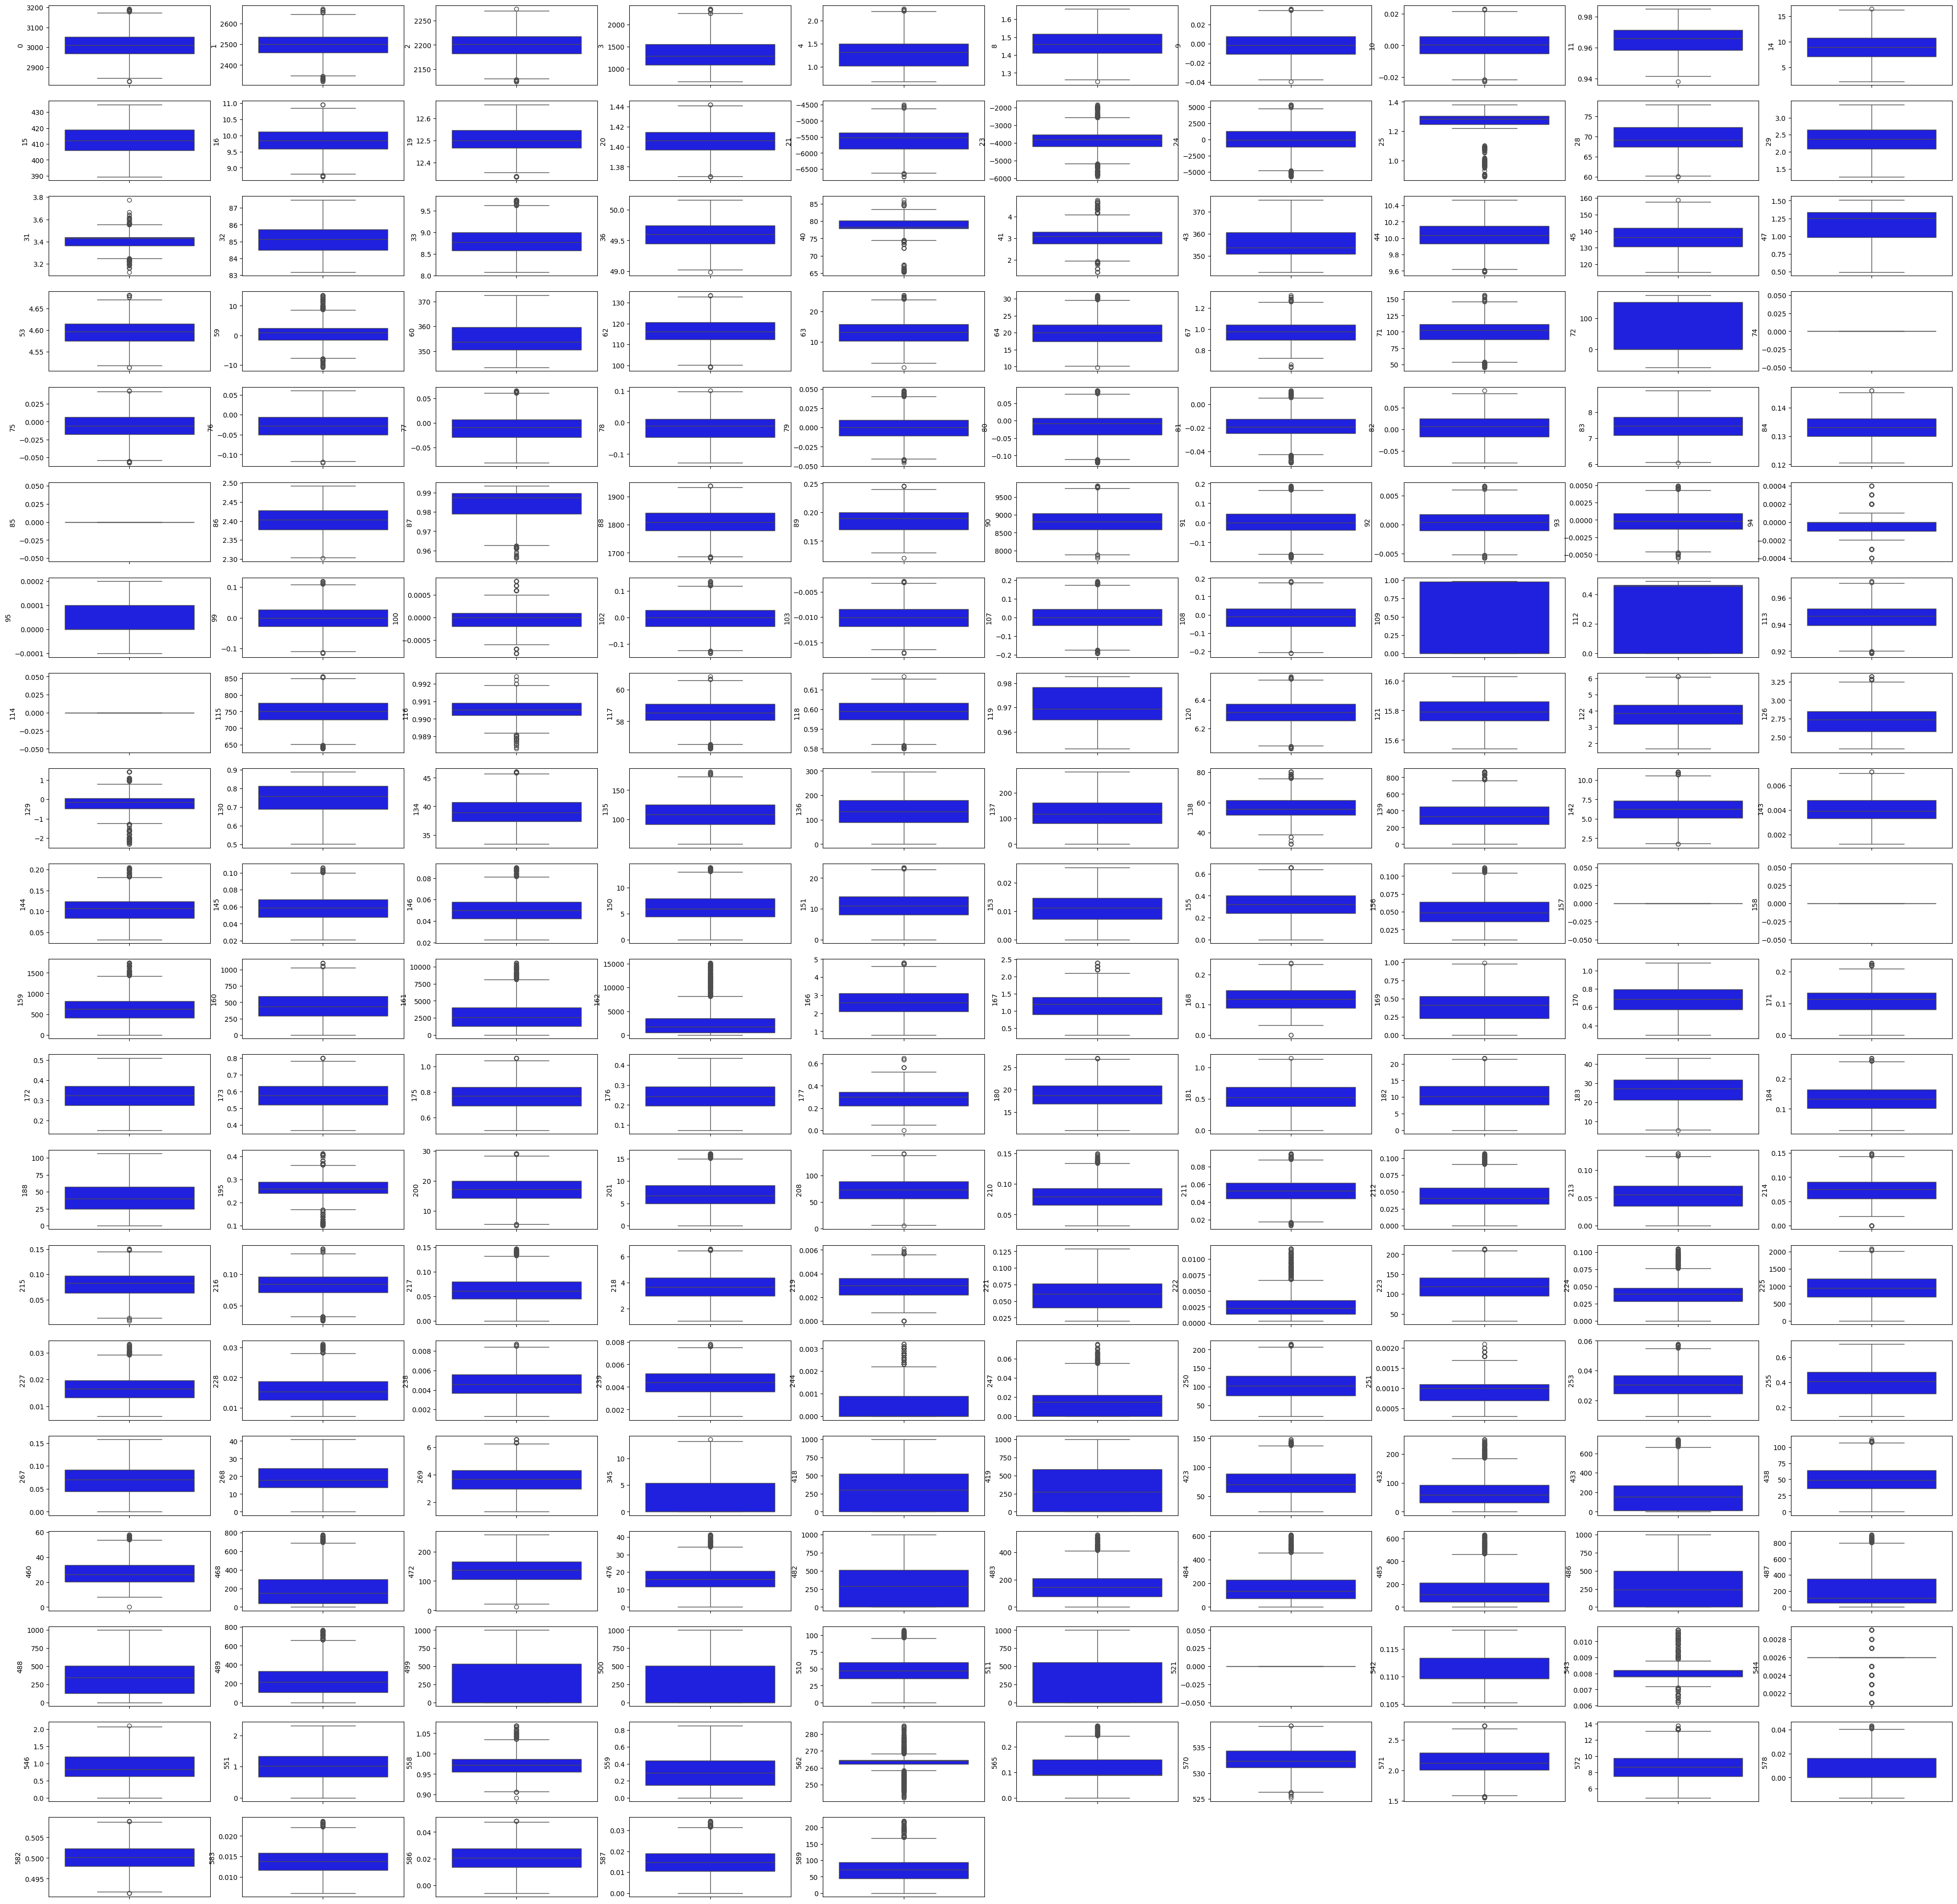

In [ ]:
#since now we have treated the outliers lets take another look at the boxplot
plt.figure(figsize=(50,50))
col=1
for i in data.columns:
  plt.subplot(num_rows, num_cols, col)
  sns.boxplot(data[i], color='blue')
  col+=1

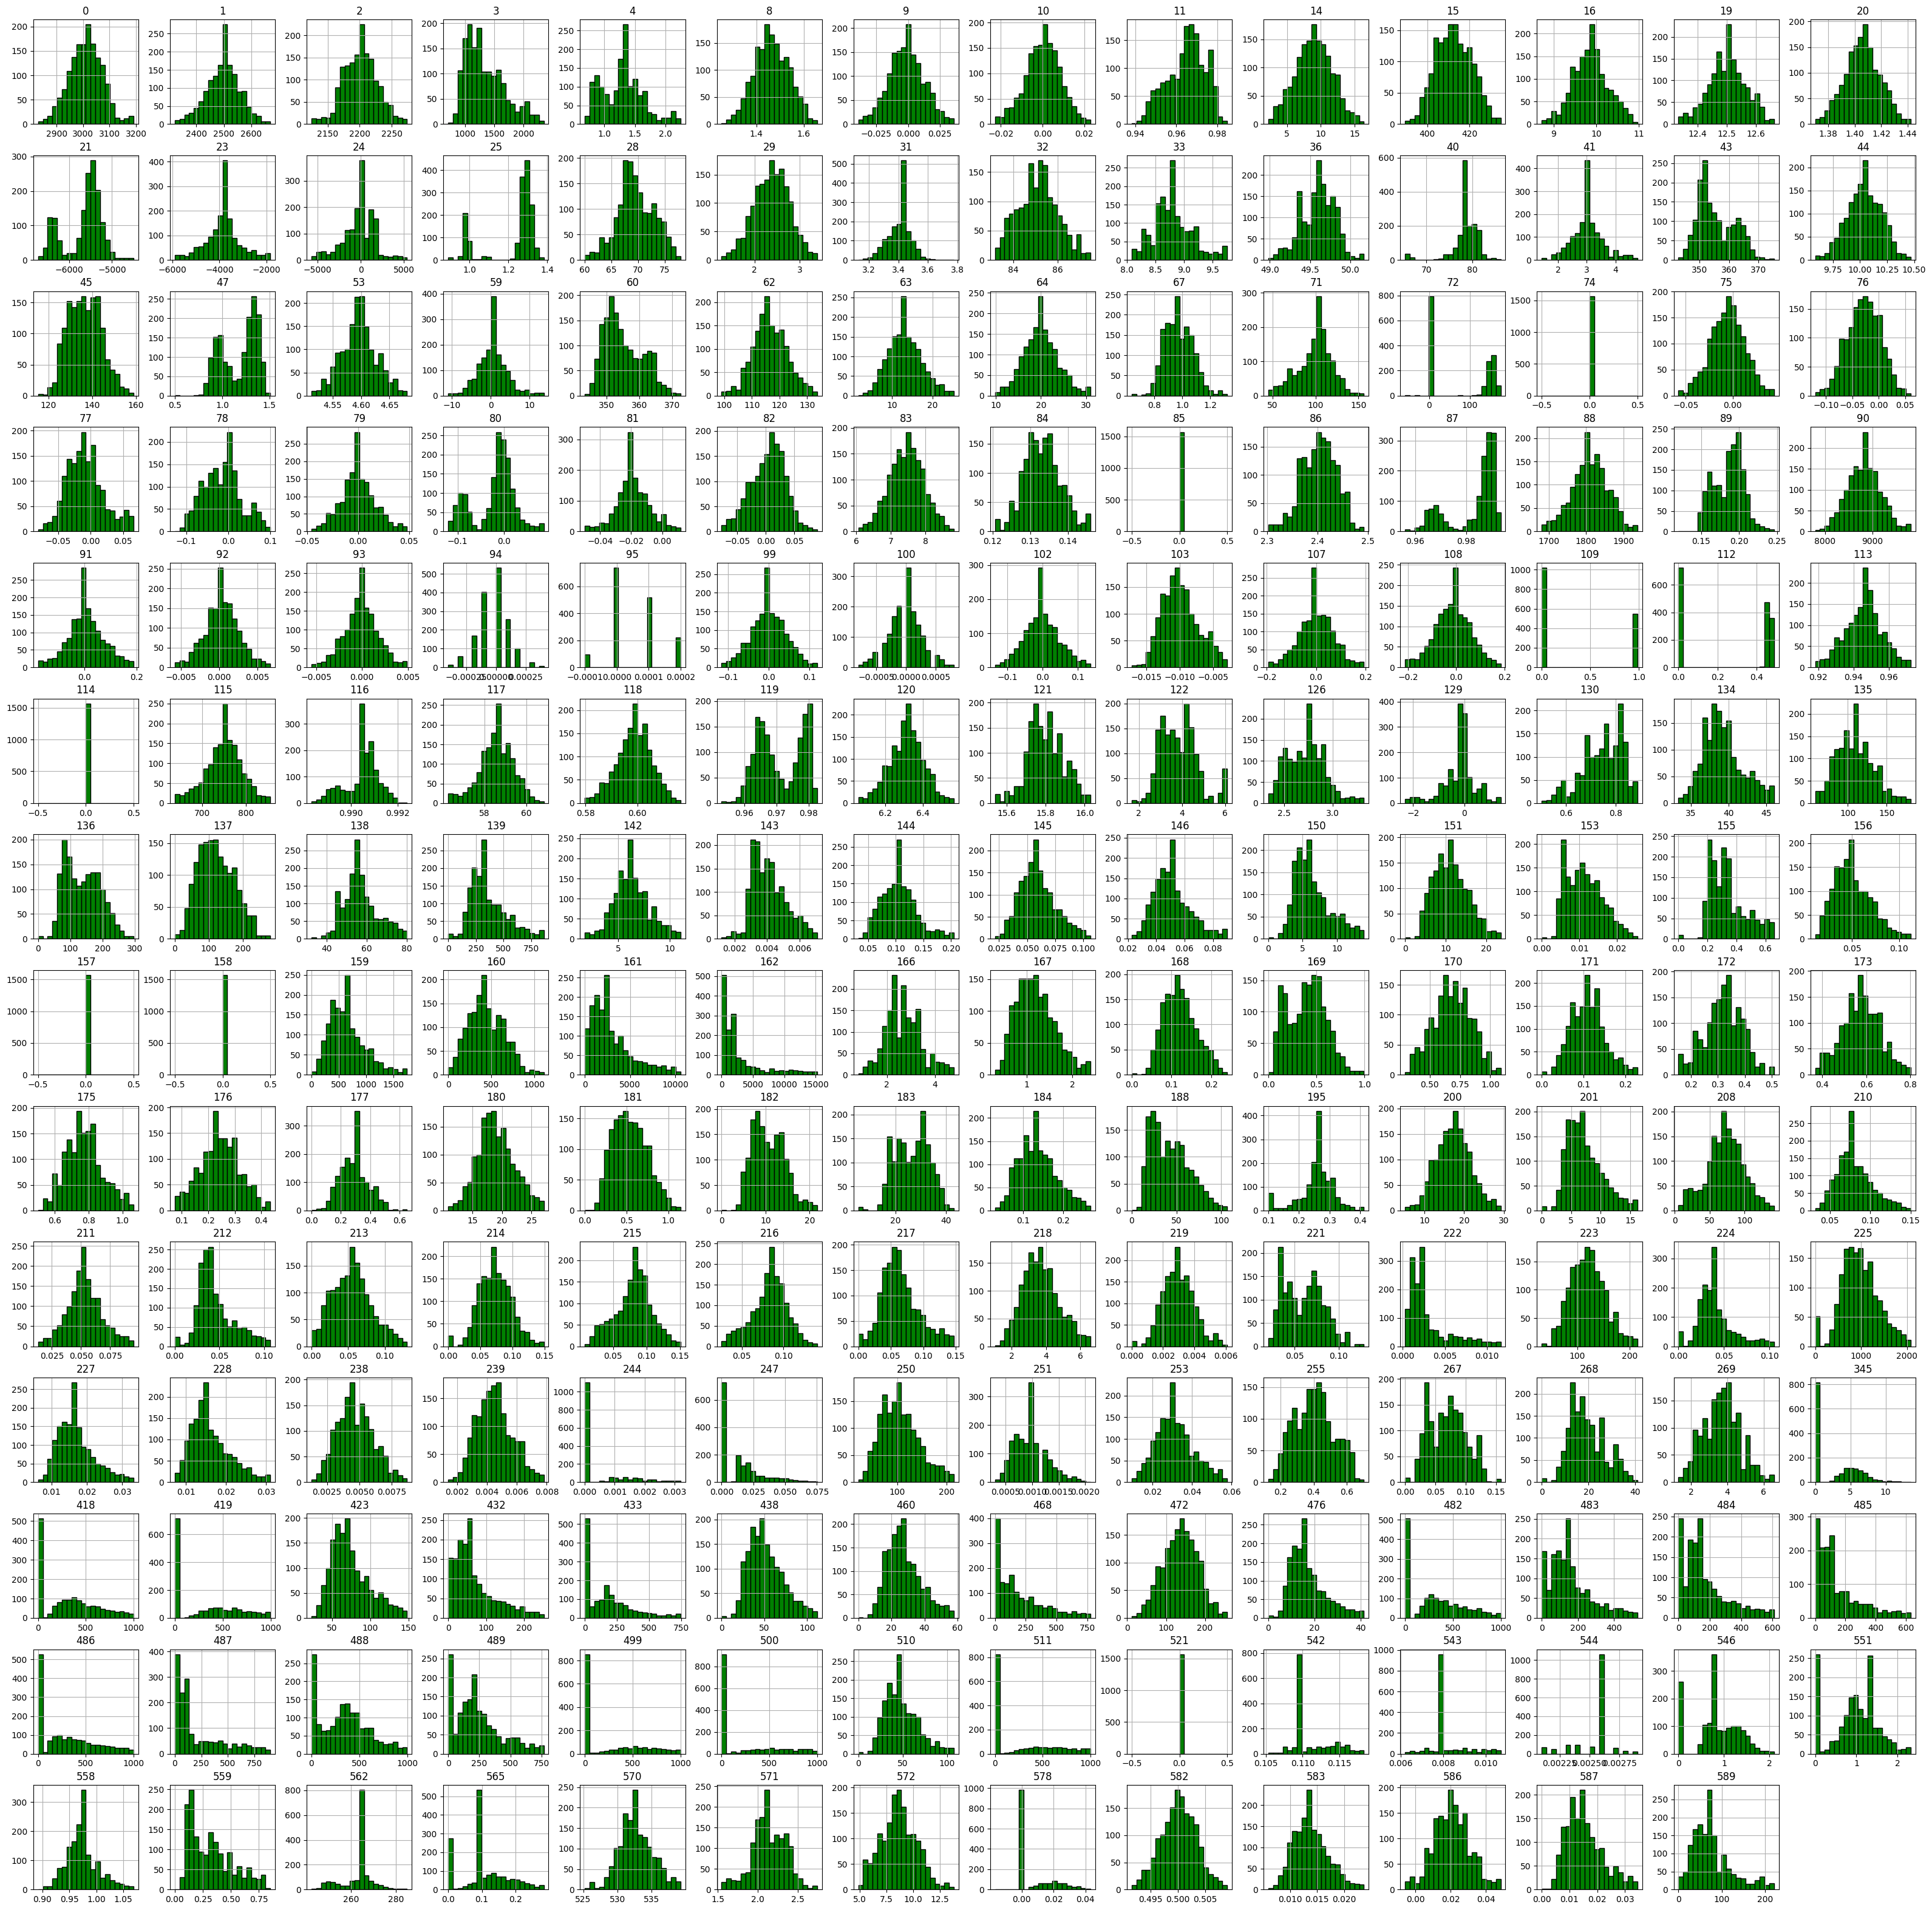

In [ ]:
#plotting histogram
data.hist(figsize=(40,40), color='green', bins=20, edgecolor='black');

we can see there are few variables which still have 0 as a constant signal, looks like these need be dropped.

<ipython-input-74-fad32f0f7235>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='black', linewidth=2)
<ipython-input-74-fad32f0f7235>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='black', linewidth=2)
<ipython-input-74-fad32f0f7235>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='black', linewidth=2)
<ipython-input-74-fad32f0f7235>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='black', linewidth=2)
<ipython-input-74-fad32f0f7235>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data[col], color='b

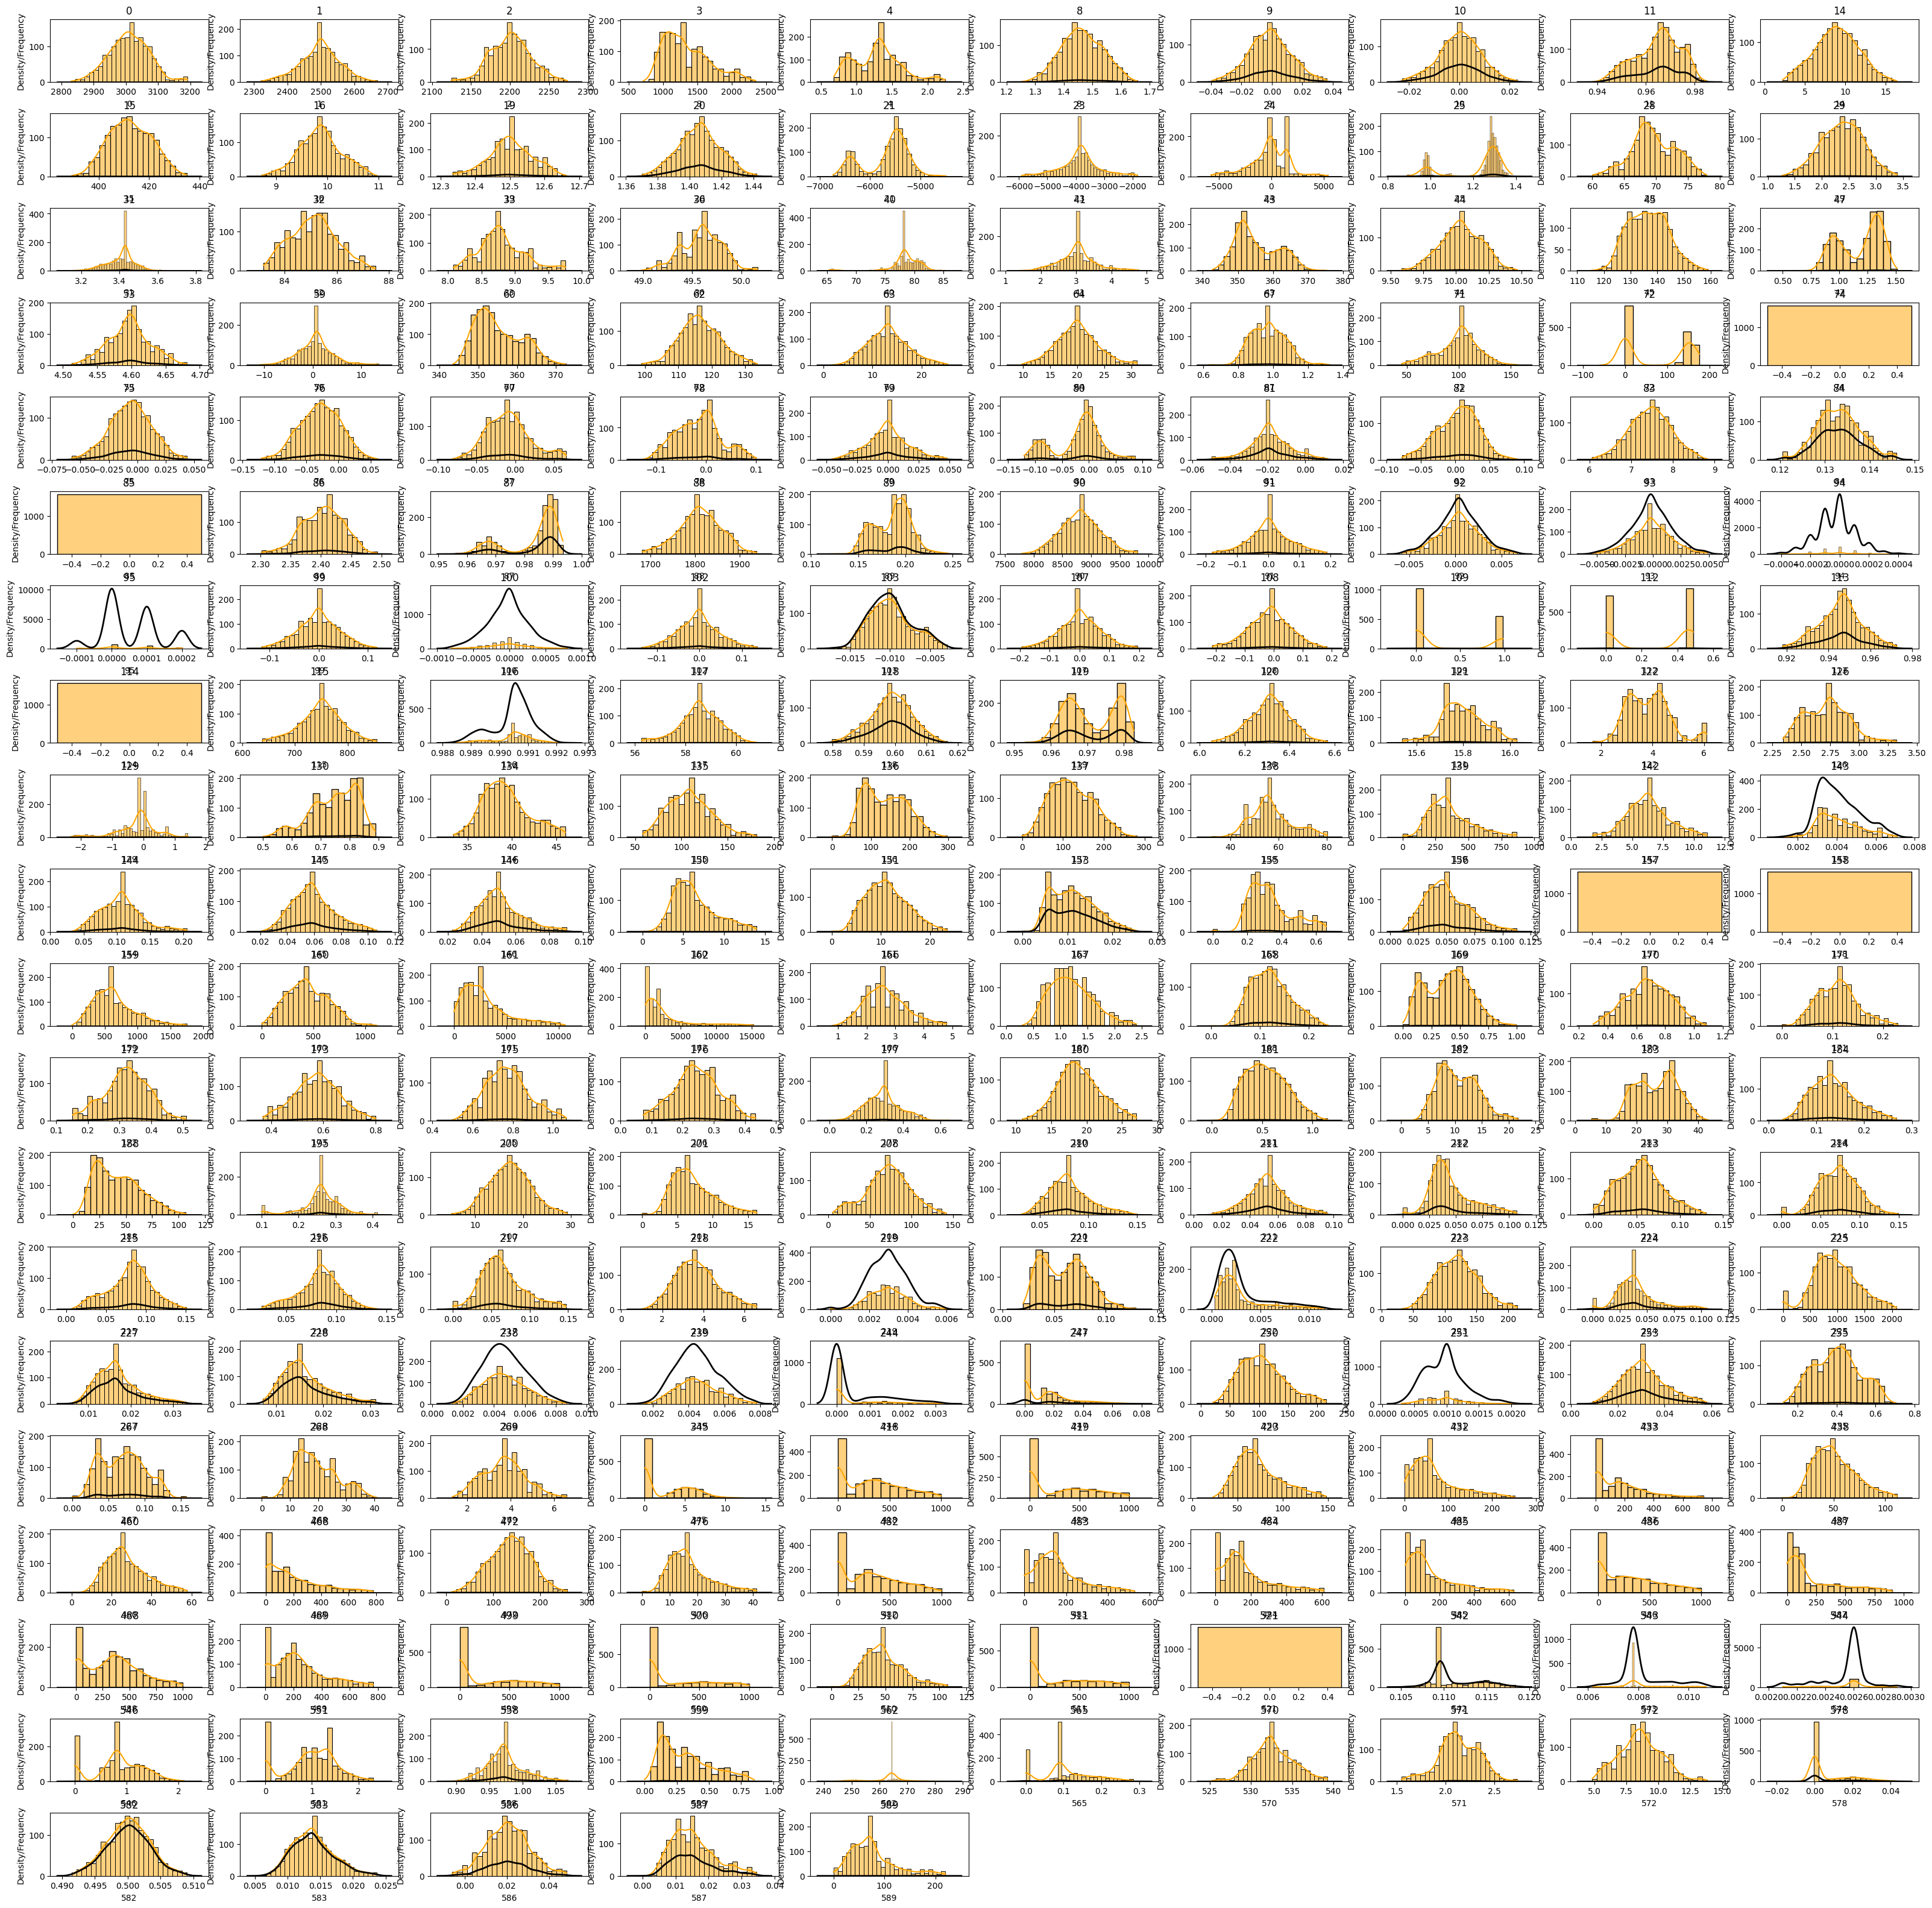

In [ ]:
plt.figure(figsize=(40, 40))

for i, col in enumerate(data.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(data[col], color='orange', kde=True)
    sns.kdeplot(data[col], color='black', linewidth=2)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Density/Frequency')

plt.subplots_adjust(hspace=0.5)
plt.show()

looks like almost all of them have normal distribution

In [ ]:
#scaling with zscore
from scipy.stats import zscore
data_scaled = data.apply(zscore)

In [ ]:
data_scaled.describe().T

count          mean       std       min       25%       50%       75%  \
0    1567.0 -1.902187e-15  1.000319 -2.899903 -0.672689  0.019204  0.678857   
1    1567.0 -2.446883e-15  1.000319 -2.921819 -0.621101  0.033772  0.627439   
2    1567.0  5.559192e-15  1.000319 -2.911031 -0.699474  0.005639  0.646028   
3    1567.0  4.443726e-16  1.000319 -1.895521 -0.778479 -0.182909  0.619699   
4    1567.0  2.902025e-16  1.000319 -1.845115 -0.836008  0.041632  0.583103   
..      ...           ...       ...       ...       ...       ...       ...   
582  1567.0 -3.752228e-15  1.000319 -2.652869 -0.646439  0.032661  0.680892   
583  1567.0  4.307694e-17  1.000319 -2.479996 -0.719792 -0.028283  0.600361   
586  1567.0 -1.269636e-16  1.000319 -2.604473 -0.697261 -0.005957  0.670637   
587  1567.0  2.085831e-16  1.000319 -2.338066 -0.724073 -0.084566  0.554941   
589  1567.0  4.534414e-18  1.000319 -1.683169 -0.706037 -0.102398  0.382611   

          max  
0    2.921707  
1    2.868115  
2    2.795421  
3    3.001915  
4    2.847439  
..        ...  
582  2.749059  
583  3.083507  
586  2.729839  
587  2.915025  
589  3.162735  

[195 rows x 8 columns]

In [ ]:
#combining the data again
y = signal['Pass/Fail']
comb = pd.concat([data_scaled, y], axis=1)

In [ ]:
comb.shape

(1567, 196)

In [ ]:
comb.describe().T

count          mean       std       min       25%       50%  \
0          1567.0 -1.902187e-15  1.000319 -2.899903 -0.672689  0.019204   
1          1567.0 -2.446883e-15  1.000319 -2.921819 -0.621101  0.033772   
2          1567.0  5.559192e-15  1.000319 -2.911031 -0.699474  0.005639   
3          1567.0  4.443726e-16  1.000319 -1.895521 -0.778479 -0.182909   
4          1567.0  2.902025e-16  1.000319 -1.845115 -0.836008  0.041632   
...           ...           ...       ...       ...       ...       ...   
583        1567.0  4.307694e-17  1.000319 -2.479996 -0.719792 -0.028283   
586        1567.0 -1.269636e-16  1.000319 -2.604473 -0.697261 -0.005957   
587        1567.0  2.085831e-16  1.000319 -2.338066 -0.724073 -0.084566   
589        1567.0  4.534414e-18  1.000319 -1.683169 -0.706037 -0.102398   
Pass/Fail  1567.0 -8.672623e-01  0.498010 -1.000000 -1.000000 -1.000000   

                75%       max  
0          0.678857  2.921707  
1          0.627439  2.868115  
2          0.646028  2.795421  
3          0.619699  3.001915  
4          0.583103  2.847439  
...             ...       ...  
583        0.600361  3.083507  
586        0.670637  2.729839  
587        0.554941  2.915025  
589        0.382611  3.162735  
Pass/Fail -1.000000  1.000000  

[196 rows x 8 columns]

In [ ]:
# dropping NaN
comb.dropna(axis=1, inplace=True)
comb.shape

(1567, 190)

###4. Data pre-processing

In [ ]:
sg = comb.copy() #copying the data

In [ ]:
#segregating the target and predictor variables
X = sg.drop(['Pass/Fail'], axis=1)
y = sg['Pass/Fail']

In [ ]:
#checking for imbalance
class_counts = y.value_counts()
print(class_counts)

Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
print("Original class distribution:")
print(y.value_counts())

# Applying SMOTE
smote = SMOTE(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

Original class distribution:
Pass/Fail
-1    1463
 1     104
Name: count, dtype: int64

Class distribution after SMOTE:
Pass/Fail
-1    1463
 1    1463
Name: count, dtype: int64


In [ ]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
# srandardizing features on trainingdata
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Combining scaled train and test data back for comparison
X_scaled = pd.concat([pd.DataFrame(X_train_scaled), pd.DataFrame(X_test_scaled)])

Original data statistics:
                  0             1             2             3             4  \
count  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean  -1.902187e-15 -2.446883e-15  5.559192e-15  4.443726e-16  2.902025e-16   
std    1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00  1.000319e+00   
min   -2.899903e+00 -2.921819e+00 -2.911031e+00 -1.895521e+00 -1.845115e+00   
25%   -6.726894e-01 -6.211011e-01 -6.994740e-01 -7.784790e-01 -8.360085e-01   
50%    1.920412e-02  3.377239e-02  5.639446e-03 -1.829092e-01  4.163166e-02   
75%    6.788566e-01  6.274389e-01  6.460284e-01  6.196990e-01  5.831032e-01   
max    2.921707e+00  2.868115e+00  2.795421e+00  3.001915e+00  2.847439e+00   

                  8             9            10            11            14  \
count  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03  1.567000e+03   
mean  -1.432875e-15 -2.267207e-17  4.534414e-18  3.990285e-16  1.587045e-17   
std    1.000319e+00  1.00

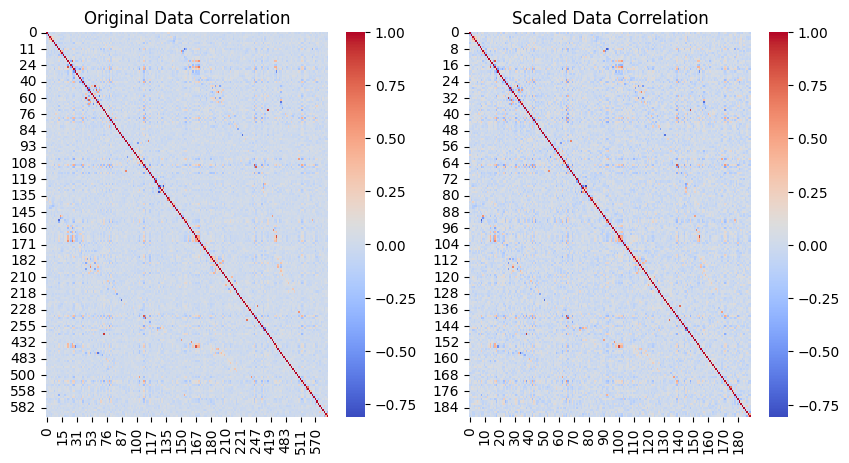

In [ ]:
# 1. Means and Standard Deviations (for numerical features)
print("Original data statistics:")
print(X.describe())
print("\nScaled data statistics:")
print(X_scaled.describe())

# 2. Correlation Matrices
corr_original = X.corr()
corr_scaled = X_scaled.corr()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(corr_original, annot=False, cmap="coolwarm")
plt.title("Original Data Correlation")

plt.subplot(1, 2, 2)
sns.heatmap(corr_scaled, annot=False, cmap="coolwarm")
plt.title("Scaled Data Correlation")
plt.show()


###5. Model training, testing and tuning

In [ ]:
#lets train our model using logistic regression
model = LogisticRegression(solver='liblinear')

model.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model.predict(X_test_scaled)

In [ ]:
#evaluating performance
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[356  93]
 [ 15 414]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.79      0.87       449
           1       0.82      0.97      0.88       429

    accuracy                           0.88       878
   macro avg       0.89      0.88      0.88       878
weighted avg       0.89      0.88      0.88       878



In [ ]:
# Defining the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
'penalty': ['l1', 'l2']}  # Type of regularization

# Creating the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, error_score='raise')

# Fiting the grid search to the data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

Best parameters found:  {'C': 100, 'penalty': 'l2'}
Best score achieved:  0.8789039298705946


In [ ]:
# Defining the parameter distributions to sample (Refined)
param_distributions = {'C': uniform(10, 1000), 'penalty': ['l2'], 'solver': ['lbfgs', 'newton-cg', 'sag']}

In [ ]:
# Creating the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=50, scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

In [ ]:
# Fiting the random search to the data
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f3e3b424850>,
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'sag']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters found: ", random_search.best_params_)
print("Best score achieved: ", random_search.best_score_)

Best parameters found:  {'C': 384.54011884736246, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score achieved:  0.8789039298705946


In [ ]:
#1 using PCA technique
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
#2. target balancing by using smote
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
#3. random forrest model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
y_pred = rf.predict(X_test_scaled)

In [ ]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[447   2]
 [  6 423]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       449
           1       1.00      0.99      0.99       429

    accuracy                           0.99       878
   macro avg       0.99      0.99      0.99       878
weighted avg       0.99      0.99      0.99       878



The model is doing an fair  job of predicting both "Fail" (-1) and "Pass" (1) outcomes.

Precision: For both classes, the model is almost always correct when it predicts a particular class.
Recall: The model is able to correctly identify almost all instances of both "Fail" and "Pass" in the dataset.
F1-score: This balanced metric confirms the strong performance for both classes.
Accuracy: The overall accuracy of 99% means that the model is correctly predicting the outcome for almost all samples.
In summary: The Random Forest model is highly accurate and balanced in its predictions, making few errors of any kind.

###6. Post Training and Conclusion

In [ ]:
# Creating a dictionary to store model names and their accuracies
results = {}

# Iterating over your models (replace with your actual model names)
for model_name, model in [("Logistic Regression", model), ("Random Forest",rf)]:
  train_accuracy = model.score(X_train_scaled, y_train)
  results[model_name + " (Train)"] = train_accuracy
  test_accuracy = model.score(X_test_scaled, y_test)
  results[model_name + " (Test)"] = test_accuracy

# Creating a DataFrame for easy comparison
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])

print(results_df)

                             Accuracy
Logistic Regression (Train)  0.933105
Logistic Regression (Test)   0.876993
Random Forest (Train)        1.000000
Random Forest (Test)         0.990888


The Random Forest model demonstrates superior performance in terms of both test accuracy and generalization. Its ability to handle high-dimensional data and the minimal overfitting further solidifies its position as the preferred model in this scenario.

In [ ]:
filename = 'final_model.pkl'

# Saving the model
with open(filename, 'wb') as file:  # Opening in binary write mode ('wb')
    pickle.dump(rf, file)

print(f"Model saved to {filename}")

Model saved to final_model.pkl


In conclusion, our analysis of the high-dimensional dataset revealed a successful approach for building a robust predictive model for Pass/Fail classification. Despite the challenges posed by the curse of dimensionality and initial class imbalance, we were able to achieve a remarkable test accuracy of 99.08% using a Random Forest classifier.